In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def option_payout(S, K, typ="call", prem=0.0):
    typ = typ.lower()   # normalize

    if typ == "call":
        p = 1
        name = "Call"
    elif typ == "put":
        p = -1
        name = "Put"
    else:
        raise ValueError(f"Unknown option type: {typ}")
    
    payout = np.maximum(p*(S - K), 0) - prem
    return payout, name

In [20]:
def options_batch(S, *options):
    n = 100
    spot_prices = np.linspace(0.6*S, 1.4*S, n)
    total_payouts = np.zeros(n)
    breakevens = []

    for option in options:
        K = option["Strike Price"]
        typ = option["Type"]
        prem = option["Premium"]
        qty = option["Quantity"]
        payout = np.zeros(n)
        for i in range(n):
            single_payout, _ = option_payout(S=spot_prices[i], K=K, prem=prem, typ=typ)
            payout[i] = qty * single_payout
            
        total_payouts += payout


    signs = np.sign(total_payouts)
    crossings = np.where(np.diff(signs))[0]

    breakevens = []
    for idx in crossings:
        x1, y1 = spot_prices[idx], total_payouts[idx]
        x2, y2 = spot_prices[idx+1], total_payouts[idx+1]
        root = x1 - y1 * (x2 - x1) / (y2 - y1)
        breakevens.append(root)
                 
    return spot_prices, total_payouts, breakevens

In [21]:
option_1 = {
    "Strike Price": 110,
    "Type": "Call",
    "Premium": 4.6,
    "Quantity": 1
}

option_2 = {
    "Strike Price": 110,
    "Type": "Put",
    "Premium": 4.6,
    "Quantity": 1
}

In [25]:
straddle_call = {"Strike Price": 110, "Type": "Call", "Premium": 4.6, "Quantity": 1}
straddle_put  = {"Strike Price": 110, "Type": "Put",  "Premium": 4.6, "Quantity": 1}

strangle_call = {"Strike Price": 115, "Type": "Call", "Premium": 3, "Quantity": 1}
strangle_put  = {"Strike Price": 105, "Type": "Put",  "Premium": 3, "Quantity": 1}

call_low  = {"Strike Price": 100, "Type": "Call", "Premium": 5, "Quantity": 1}
call_high = {"Strike Price": 110, "Type": "Call", "Premium": 2, "Quantity": 1}

put_high = {"Strike Price": 110, "Type": "Put", "Premium": 4, "Quantity": 1}
put_low  = {"Strike Price": 100, "Type": "Put", "Premium": 2, "Quantity": 1}

portfolio = [
    straddle_call, straddle_put,
    strangle_call, strangle_put,
    call_low, call_high,
    put_high, put_low
]

In [26]:
spot_prices, payouts, breakevens = options_batch(105, *portfolio)

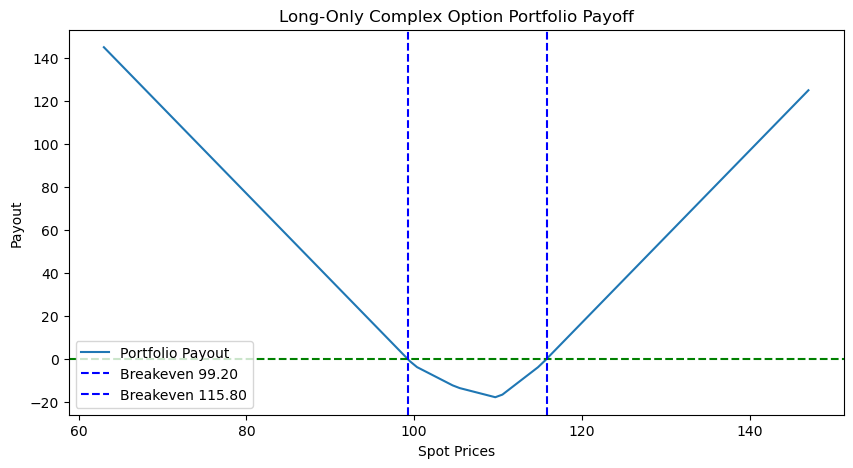

In [27]:
plt.figure(figsize=(10,5))
plt.plot(spot_prices, payouts, label="Portfolio Payout")
plt.axhline(0, color="green", linestyle="--")
for b in breakevens:
    plt.axvline(b, color="blue", linestyle="--", label=f"Breakeven {b:.2f}")
plt.xlabel("Spot Prices")
plt.ylabel("Payout")
plt.title("Long-Only Complex Option Portfolio Payoff")
plt.legend()
plt.show()